In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sunraster.instr.spice import read_spice_l2_fits
import astropy.units as u
from astropy.visualization import ImageNormalize, AsinhStretch
from fancy_colorbar import plot_colorbar
import sunpy.map
from sunpy.map import make_fitswcs_header
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord

In [2]:
spice_cube_1019 = read_spice_l2_fits("../../src/SPICE/20221019/solo_L2_spice-n-ras_20221019T185802_V22_150995357-059.fits")

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
Set MJD-OBS to 59871.790311 from DATE-OBS.
Set MJD-BEG to 59871.790311 from DATE-BEG.
Set MJD-AVG to 59871.794237 from DATE-AVG.
Set MJD-END to 59871.798159 from DATE-END'. [astropy.wcs.wcs]


In [3]:
spice_cube_1019.keys()

dict_keys(['O III 703 / Mg IX 706 (Merged)', 'Fe XX 721 + O II (Merged)', 'N IV 765 - SH - Comp 8 ... Ne VIII 770 - LH - Comp 8 (Merged)', 'Ly-gamma-CIII group (Merged)', 'Ly Beta 1025 (Merged)', 'O VI 1032 (Merged)'])

In [4]:
spice_NIV_NeVIII_window_1019 = spice_cube_1019["N IV 765 - SH - Comp 8 ... Ne VIII 770 - LH - Comp 8 (Merged)"]

In [ ]:
spice_NIV_NeVIII_window_1019.meta

SPICEMeta
---------
Observatory:				Solar Orbiter
Instrument:				SPICE
Detector:				SW
Spectral Window:			N IV 765 - SH - Comp 8 ... Ne VIII 770 - LH - Comp 8 (Merged)
Date:					2022-10-19T18:58:02.856
OBS_ID (SOC Observation ID):		SSPI_090C_RS0_111_UMoa_11J
SPIOBSID (SPICE Observation ID):	150995357

In [ ]:
spice_NIV_NeVIII_window_1019.wcs[0,0,:,:]

SlicedFITSWCS Transformation

This transformation has 2 pixel and 3 world dimensions

Array shape (Numpy order): (832, 128)

Pixel Dim  Axis Name  Data size  Bounds
        0  None             128  None
        1  None             832  None

World Dim  Axis Name                                                          Physical Type                   Units
        0  Helioprojective longitude (Solar X), increases towards Solar West  custom:pos.helioprojective.lon  deg
        1  Helioprojective latitude (Solar Y), increases towards Solar North  custom:pos.helioprojective.lat  deg
        2  Time (Degenerate Dimension)                                        time                            s

Correlation between pixel and world axes:

           Pixel Dim
World Dim    0    1
        0  yes  yes
        1  yes  yes
        2  yes   no

In [7]:
spice_NIV_NeVIII_window_1019.data.shape

(1, 71, 832, 128)

In [8]:
spice_NIV_NeVIII_window_1019_wvl = spice_NIV_NeVIII_window_1019.spectral_axis.to_value(u.AA)

/tmp/ipykernel_494247/75334194.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(spice_NIV_NeVIII_window_1019.data,axis=(0,2,3))[1:-1])


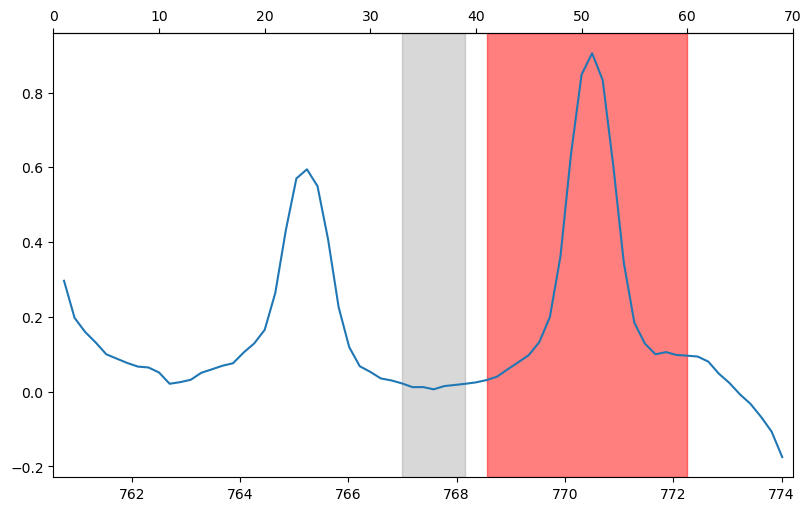

In [9]:
fig, ax = plt.subplots(figsize=(8,5),layout="constrained")
ax.plot(spice_NIV_NeVIII_window_1019_wvl[1:-1],
        np.nanmean(spice_NIV_NeVIII_window_1019.data,axis=(0,2,3))[1:-1])

ax.set_xlim(spice_NIV_NeVIII_window_1019_wvl[0], spice_NIV_NeVIII_window_1019_wvl[-1])

def forward(x):
    return np.interp(x, spice_NIV_NeVIII_window_1019_wvl,
                     np.arange(spice_NIV_NeVIII_window_1019.data.shape[1]))

def inverse(x):
    return np.interp(x, np.arange(spice_NIV_NeVIII_window_1019.data.shape[1]),
                     spice_NIV_NeVIII_window_1019_wvl) 

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
ax.axvspan(inverse(41), inverse(60), color='red', alpha=0.5)
ax.axvspan(inverse(33), inverse(39), color='grey', alpha=0.3)


In [10]:
NeVIII_peak_int_1019 = np.nanmax(spice_NIV_NeVIII_window_1019.data[:,41:60,:,:],axis=(0,1))
NeVIII_sum_int_1019 = np.nansum(spice_NIV_NeVIII_window_1019.data[:,41:60,:,:],axis=(0,1)) - 20*np.nanmean(spice_NIV_NeVIII_window_1019.data[:,33:40,:,:],axis=(0,1))
NeVIII_sum_int_1019 = NeVIII_sum_int_1019 * np.nanmean(np.diff(spice_NIV_NeVIII_window_1019_wvl[41:60]))/10


/tmp/ipykernel_494247/2127756410.py:1: RuntimeWarning: All-NaN slice encountered
  NeVIII_peak_int_1019 = np.nanmax(spice_NIV_NeVIII_window_1019.data[:,41:60,:,:],axis=(0,1))
/tmp/ipykernel_494247/2127756410.py:2: RuntimeWarning: Mean of empty slice
  NeVIII_sum_int_1019 = np.nansum(spice_NIV_NeVIII_window_1019.data[:,41:60,:,:],axis=(0,1)) - 20*np.nanmean(spice_NIV_NeVIII_window_1019.data[:,33:40,:,:],axis=(0,1))


In [11]:
list(spice_NIV_NeVIII_window_1019.meta.keys())

['XTENSION',
 'BITPIX',
 'NAXIS',
 'NAXIS1',
 'NAXIS2',
 'NAXIS3',
 'NAXIS4',
 'PCOUNT',
 'GCOUNT',
 'DATE',
 '',
 'EXTNAME',
 'FILENAME',
 'STUDYTYP',
 'STUDYDES',
 'STUDY',
 'OBS_MODE',
 'OBS_TYPE',
 'AUTHOR',
 'OBS_ID',
 'SPIOBSID',
 'OBS_DESC',
 'PURPOSE',
 'READMODE',
 'TRIGGERD',
 'OBJECT',
 'TARGET',
 'SOOPNAME',
 'SOOPTYPE',
 'STP',
 'SETFILE',
 'SETVER',
 'APID',
 'NRASTERS',
 'RASTERNO',
 'STUDY_ID',
 'MISOSTUD',
 'XSTART',
 'XPOSURE',
 'FOCUSPOS',
 'POINT_ID',
 'MOSAICID',
 'SVO_SEP1',
 'SVO_SEP2',
 'SVO_SEP3',
 'SVO_SEP4',
 'SVO_GRP',
 'NWIN',
 'NWIN_PRF',
 'NWIN_DUM',
 'NWIN_INT',
 'NWIN_ORG',
 'PXCOV3',
 'WAVECOV',
 'TIMESYS',
 'DATEREF',
 'DATE-BEG',
 'DATE-OBS',
 'DATE-AVG',
 'DATE-END',
 'SEQ_BEG',
 'TELAPSE',
 'OBT_BEG',
 'LEVEL',
 'CREATOR',
 'ORIGIN',
 'VERS_SW',
 'VERS_CAL',
 'VERSION',
 'OBSRVTRY',
 'INSTRUME',
 'CROTA',
 'COMPLETE',
 'PCT_CMPL',
 'STUDYFLG',
 'NOSPECTR',
 'CALMODE',
 'DBLEXP',
 'DBLEXPNO',
 'DARKMAP',
 'BLACKLEV',
 'WIN_TYPE',
 'DATAPROD',
 'TELE

In [12]:
spice_NIV_NeVIII_window_meta_1019 = spice_NIV_NeVIII_window_1019.meta.copy()
spice_NIV_NeVIII_window_meta_1019["NAXIS"] = 2
spice_NIV_NeVIII_window_meta_1019.pop("NAXIS4", 0)
spice_NIV_NeVIII_window_meta_1019.pop("NBIN4", 0)
spice_NIV_NeVIII_window_meta_1019.pop("CRPIX4", 0)
spice_NIV_NeVIII_window_meta_1019.pop("CDELT4", 0)
spice_NIV_NeVIII_window_meta_1019.pop("CRVAL4", 0)
spice_NIV_NeVIII_window_meta_1019.pop("CTYPE4", 0)
spice_NIV_NeVIII_window_meta_1019.pop("CUNIT4", 0)
spice_NIV_NeVIII_window_meta_1019.pop("CNAME4", 0)
spice_NIV_NeVIII_window_meta_1019.pop("PC4_1", 0)
spice_NIV_NeVIII_window_meta_1019.pop("PC4_4", 0)
spice_NIV_NeVIII_window_meta_1019.pop("NAXIS3", 0)
spice_NIV_NeVIII_window_meta_1019.pop("NBIN3", 0)
spice_NIV_NeVIII_window_meta_1019.pop("CRPIX3", 0)
spice_NIV_NeVIII_window_meta_1019.pop("CDELT3", 0)
spice_NIV_NeVIII_window_meta_1019.pop("CRVAL3", 0)
spice_NIV_NeVIII_window_meta_1019.pop("CTYPE3", 0)
spice_NIV_NeVIII_window_meta_1019.pop("CUNIT3", 0)
spice_NIV_NeVIII_window_meta_1019.pop("CNAME3", 0)
spice_NIV_NeVIII_window_meta_1019.pop("PC3_3", 0)


1.0

In [13]:
NeVIII_peak_int_1019_sunpy_map = sunpy.map.Map(NeVIII_peak_int_1019, spice_NIV_NeVIII_window_meta_1019)
NeVIII_peak_int_1019_sunpy_map = NeVIII_peak_int_1019_sunpy_map.submap([0,67]*u.pix, top_right=[127, 719]*u.pix)
NeVIII_sum_int_1019_sunpy_map = sunpy.map.Map(NeVIII_sum_int_1019, spice_NIV_NeVIII_window_meta_1019)
NeVIII_sum_int_1019_sunpy_map = NeVIII_sum_int_1019_sunpy_map.submap([0,67]*u.pix, top_right=[127, 719]*u.pix)

In [14]:
data_fake = np.full((10, 10), np.nan)

skycoord_fake_1019 = SkyCoord(0*u.arcsec, 0*u.arcsec, obstime=spice_NIV_NeVIII_window_meta_1019['DATE_EAR'],
                    observer='earth', frame="helioprojective")
header_fake_1019 = sunpy.map.make_fitswcs_header(data_fake, skycoord_fake_1019, scale=[220, 220]*u.arcsec/u.pixel)

blank_map_1019 = sunpy.map.Map(data_fake, header_fake_1019)

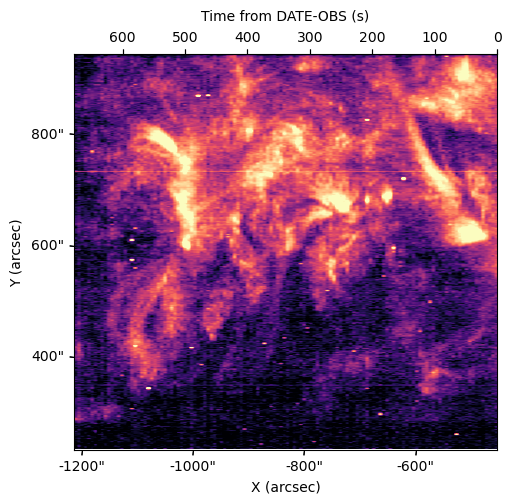

In [28]:
fig = plt.figure(figsize=(5, 5), layout="constrained")
ax = fig.add_subplot(111, projection=spice_NIV_NeVIII_window_1019.wcs[0,0,67:720,:])
im = ax.imshow(NeVIII_peak_int_1019[67:720,:], origin='lower', cmap='magma', aspect=spice_NIV_NeVIII_window_1019.wcs.wcs.cdelt[1]/spice_NIV_NeVIII_window_1019.wcs.wcs.cdelt[0],
          norm=ImageNormalize(vmin=np.nanpercentile(NeVIII_peak_int_1019,10),
                              vmax=np.nanpercentile(NeVIII_peak_int_1019,99), stretch=AsinhStretch()),
                              )
ax.coords[0].set_axislabel("X (arcsec)")
ax.coords[1].set_axislabel("Y (arcsec)")
ax.coords[2].set_axislabel("Time from DATE-OBS (s)")

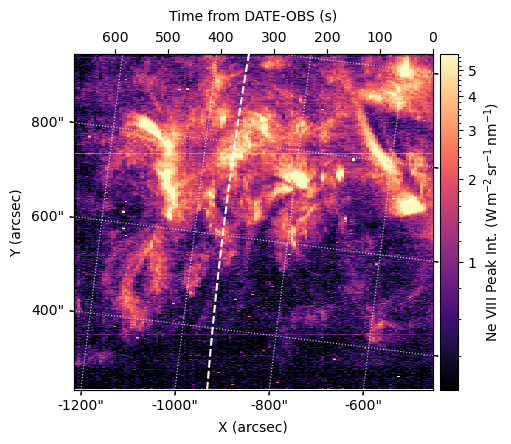

In [16]:
fig = plt.figure(figsize=(5, 5), layout="constrained")
ax = fig.add_subplot(111, projection=spice_NIV_NeVIII_window_1019.wcs[0,0,67:720,:])
im = ax.imshow(NeVIII_peak_int_1019[67:720,:], origin='lower', cmap='magma', aspect=spice_NIV_NeVIII_window_1019.wcs.wcs.cdelt[1]/spice_NIV_NeVIII_window_1019.wcs.wcs.cdelt[0],
          norm=ImageNormalize(vmin=np.nanpercentile(NeVIII_peak_int_1019,10),
                              vmax=np.nanpercentile(NeVIII_peak_int_1019,99), stretch=AsinhStretch()),
                              alpha=0)
ax.coords[0].set_axislabel("X (arcsec)")
ax.coords[1].set_axislabel("Y (arcsec)")
ax.coords[2].set_axislabel("Time from DATE-OBS (s)")

# ax.coords.grid(True, color='white', ls='solid')

ax_invisible = fig.add_subplot(111, projection=NeVIII_peak_int_1019_sunpy_map.wcs)
im = ax_invisible.imshow(NeVIII_peak_int_1019_sunpy_map.data, aspect=spice_NIV_NeVIII_window_1019.wcs.wcs.cdelt[1]/spice_NIV_NeVIII_window_1019.wcs.wcs.cdelt[0],
                              norm=ImageNormalize(vmin=np.nanpercentile(NeVIII_peak_int_1019,10),
                              vmax=np.nanpercentile(NeVIII_peak_int_1019,99), stretch=AsinhStretch()),
                              cmap='magma', interpolation='none')
# NeVIII_peak_int_1019_sunpy_map.plot(axes=ax_invisible, alpha=0, 
#                                aspect=spice_NIV_NeVIII_window_1019.wcs.wcs.cdelt[1]/spice_NIV_NeVIII_window_1019.wcs.wcs.cdelt[0],
#                                title=None)
ax_invisible.coords.grid(True, color='white', ls=':', lw=0.8, alpha=0.8)
ax_invisible.set_facecolor((0,0,0,0))
ax_invisible.coords[0].set_axislabel(" ")
ax_invisible.coords[1].set_axislabel(" ")
ax_invisible.tick_params(axis="x", bottom=False, top=False, labelbottom=False, labeltop=False)
ax_invisible.tick_params(axis="y", left=False, right=True, labelleft=False, labelright=False)
clb, clb_ax = plot_colorbar(im, ax_invisible, bbox_to_anchor=(1.02, 0, 0.05, 1))
clb_ax.set_ylabel(r"Ne VIII Peak Int. (W$\rm\,m^{-2}\,sr^{-1}\,nm^{-1}$)")
blank_map_1019.draw_limb(color='white', lw=1.5, axes=ax_invisible, ls="--")
# ax_invisible.coords[0].frame.set_linewidth(0)
# ax_invisible.coords[1].frame.set_linewidth(0)
# ax_invisible.coords[0].frame.set_color('black')
# ax_invisible.coords[1].frame.set_color('black')

fig.savefig("../../figs/test_figs/NeVIII_peak_int_1019.pdf", bbox_inches='tight')

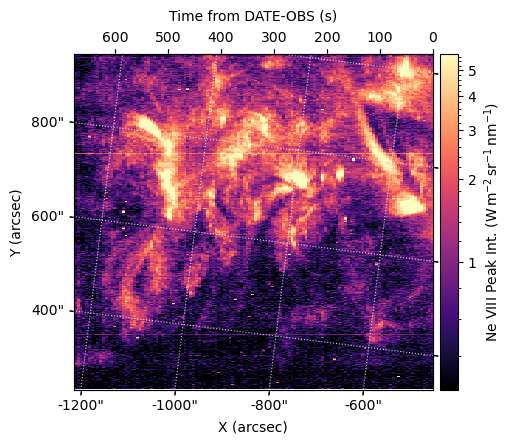

In [17]:
fig = plt.figure(figsize=(5, 5), layout="constrained")
ax = fig.add_subplot(111, projection=spice_NIV_NeVIII_window_1019.wcs[0,0,67:720,:])
im = ax.imshow(NeVIII_peak_int_1019[67:720,:], origin='lower', cmap='magma', aspect=spice_NIV_NeVIII_window_1019.wcs.wcs.cdelt[1]/spice_NIV_NeVIII_window_1019.wcs.wcs.cdelt[0],
          norm=ImageNormalize(vmin=np.nanpercentile(NeVIII_peak_int_1019,10),
                              vmax=np.nanpercentile(NeVIII_peak_int_1019,99), stretch=AsinhStretch()),
                              alpha=0)
ax.coords[0].set_axislabel("X (arcsec)")
ax.coords[1].set_axislabel("Y (arcsec)")
ax.coords[2].set_axislabel("Time from DATE-OBS (s)")

# ax.coords.grid(True, color='white', ls='solid')

ax_invisible = fig.add_subplot(111, projection=NeVIII_peak_int_1019_sunpy_map.wcs)
im = ax_invisible.imshow(NeVIII_peak_int_1019_sunpy_map.data, aspect=spice_NIV_NeVIII_window_1019.wcs.wcs.cdelt[1]/spice_NIV_NeVIII_window_1019.wcs.wcs.cdelt[0],
                              norm=ImageNormalize(vmin=np.nanpercentile(NeVIII_peak_int_1019,10),
                              vmax=np.nanpercentile(NeVIII_peak_int_1019,99), stretch=AsinhStretch()),
                              cmap='magma', interpolation='none')
# NeVIII_peak_int_1019_sunpy_map.plot(axes=ax_invisible, alpha=0, 
#                                aspect=spice_NIV_NeVIII_window_1019.wcs.wcs.cdelt[1]/spice_NIV_NeVIII_window_1019.wcs.wcs.cdelt[0],
#                                title=None)
ax_invisible.coords.grid(True, color='white', ls=':', lw=0.8, alpha=0.8)
ax_invisible.set_facecolor((0,0,0,0))
ax_invisible.coords[0].set_axislabel(" ")
ax_invisible.coords[1].set_axislabel(" ")
ax_invisible.tick_params(axis="x", bottom=False, top=False, labelbottom=False, labeltop=False)
ax_invisible.tick_params(axis="y", left=False, right=True, labelleft=False, labelright=False)
clb, clb_ax = plot_colorbar(im, ax_invisible, bbox_to_anchor=(1.02, 0, 0.05, 1))
clb_ax.set_ylabel(r"Ne VIII Peak Int. (W$\rm\,m^{-2}\,sr^{-1}\,nm^{-1}$)")
# blank_map_1019.draw_limb(color='white', lw=1.5, axes=ax_invisible, ls="--")
# ax_invisible.coords[0].frame.set_linewidth(0)
# ax_invisible.coords[1].frame.set_linewidth(0)
# ax_invisible.coords[0].frame.set_color('black')
# ax_invisible.coords[1].frame.set_color('black')

fig.savefig("../../figs/test_figs/NeVIII_peak_int_1019_no_limb.pdf", bbox_inches='tight')

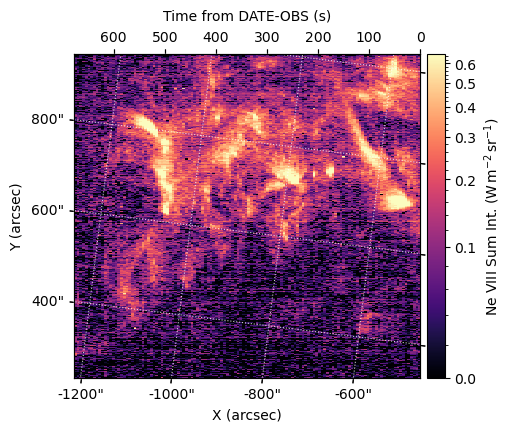

In [18]:
fig = plt.figure(figsize=(5, 5), layout="constrained")
ax = fig.add_subplot(111, projection=spice_NIV_NeVIII_window_1019.wcs[0,0,67:720,:])
im = ax.imshow(NeVIII_sum_int_1019[67:720,:], origin='lower', cmap='magma', aspect=spice_NIV_NeVIII_window_1019.wcs.wcs.cdelt[1]/spice_NIV_NeVIII_window_1019.wcs.wcs.cdelt[0],
          norm=ImageNormalize(vmin=np.nanpercentile(NeVIII_sum_int_1019,10),
                              vmax=np.nanpercentile(NeVIII_sum_int_1019,99), stretch=AsinhStretch()),
                              alpha=0)
ax.coords[0].set_axislabel("X (arcsec)")
ax.coords[1].set_axislabel("Y (arcsec)")
ax.coords[2].set_axislabel("Time from DATE-OBS (s)")


ax_invisible = fig.add_subplot(111, projection=NeVIII_sum_int_1019_sunpy_map.wcs)
im = ax_invisible.imshow(NeVIII_sum_int_1019_sunpy_map.data, aspect=spice_NIV_NeVIII_window_1019.wcs.wcs.cdelt[1]/spice_NIV_NeVIII_window_1019.wcs.wcs.cdelt[0],
                              norm=ImageNormalize(vmin=0,
                              vmax=np.nanpercentile(NeVIII_sum_int_1019,99), stretch=AsinhStretch()),
                              cmap='magma', interpolation='none')

ax_invisible.coords.grid(True, color='white', ls=':', lw=0.8, alpha=0.8)
ax_invisible.set_facecolor((0,0,0,0))
ax_invisible.coords[0].set_axislabel(" ")
ax_invisible.coords[1].set_axislabel(" ")
ax_invisible.tick_params(axis="x", bottom=False, top=False, labelbottom=False, labeltop=False)
ax_invisible.tick_params(axis="y", left=False, right=True, labelleft=False, labelright=False)
clb, clb_ax = plot_colorbar(im, ax_invisible, bbox_to_anchor=(1.02, 0, 0.05, 1))
clb_ax.set_ylabel(r"Ne VIII Sum Int. (W$\rm\,m^{-2}\,sr^{-1}$)")
# ax_invisible.coords[0].frame.set_linewidth(0)
# ax_invisible.coords[1].frame.set_linewidth(0)
# ax_invisible.coords[0].frame.set_color('black')
# ax_invisible.coords[1].frame.set_color('black')

fig.savefig("../../figs/test_figs/NeVIII_sum_int_1019.pdf", bbox_inches='tight')


In [19]:
spice_cube_1024 = read_spice_l2_fits("../../src/SPICE/20221024/solo_L2_spice-n-ras_20221024T190134_V22_150995395-058.fits")

keyword looks very much like CROTAn but isn't. [astropy.wcs.wcs]
Set MJD-OBS to 59876.792762 from DATE-OBS.
Set MJD-BEG to 59876.792762 from DATE-BEG.
Set MJD-AVG to 59876.796688 from DATE-AVG.
Set MJD-END to 59876.800610 from DATE-END'. [astropy.wcs.wcs]


In [20]:
spice_NIV_NeVIII_window_1024 = spice_cube_1024["N IV 765 - SH - Comp 8 ... Ne VIII 770 - LH - Comp 8 (Merged)"]

In [21]:
spice_NIV_NeVIII_window_1024_wvl = spice_NIV_NeVIII_window_1024.spectral_axis.to_value(u.AA)

/tmp/ipykernel_494247/2618228016.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(spice_NIV_NeVIII_window_1024.data,axis=(0,2,3))[1:-1])


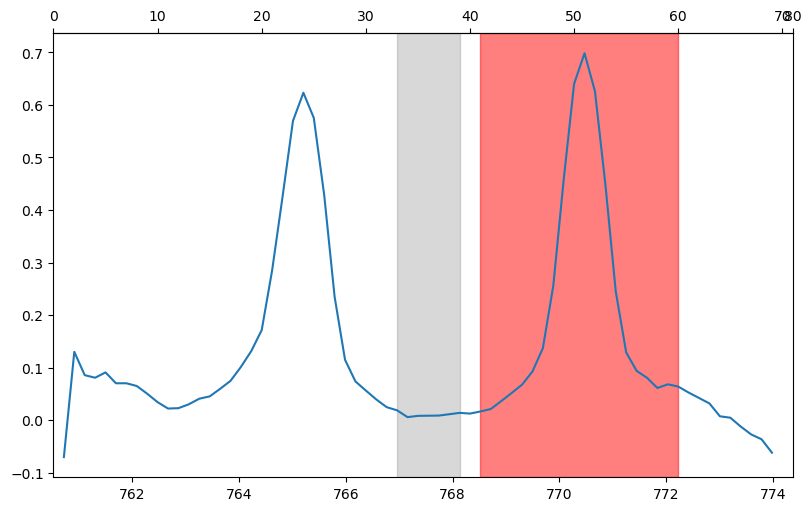

In [22]:
fig, ax = plt.subplots(figsize=(8,5),layout="constrained")
ax.plot(spice_NIV_NeVIII_window_1024_wvl[1:-1],
        np.nanmean(spice_NIV_NeVIII_window_1024.data,axis=(0,2,3))[1:-1])

ax.set_xlim(spice_NIV_NeVIII_window_1024_wvl[0], spice_NIV_NeVIII_window_1024_wvl[-1])

def forward(x):
    return np.interp(x, spice_NIV_NeVIII_window_1024_wvl,
                     np.arange(spice_NIV_NeVIII_window_1024.data.shape[1]))

def inverse(x):
    return np.interp(x, np.arange(spice_NIV_NeVIII_window_1024.data.shape[1]),
                     spice_NIV_NeVIII_window_1024_wvl)

secax = ax.secondary_xaxis('top', functions=(forward, inverse))
ax.axvspan(inverse(41), inverse(60), color='red', alpha=0.5)
ax.axvspan(inverse(33), inverse(39), color='grey', alpha=0.3)


In [23]:
NeVIII_peak_int_1024 = np.nanmax(spice_NIV_NeVIII_window_1024.data[:,41:60,:,:],axis=(0,1))
NeVIII_sum_int_1024 = np.nansum(spice_NIV_NeVIII_window_1024.data[:,41:60,:,:],axis=(0,1)) - 20*np.nanmean(spice_NIV_NeVIII_window_1024.data[:,33:40,:,:],axis=(0,1))
NeVIII_sum_int_1024 = NeVIII_sum_int_1024 * np.nanmean(np.diff(spice_NIV_NeVIII_window_1024_wvl[41:60]))/10

/tmp/ipykernel_494247/2210281424.py:1: RuntimeWarning: All-NaN slice encountered
  NeVIII_peak_int_1024 = np.nanmax(spice_NIV_NeVIII_window_1024.data[:,41:60,:,:],axis=(0,1))
/tmp/ipykernel_494247/2210281424.py:2: RuntimeWarning: Mean of empty slice
  NeVIII_sum_int_1024 = np.nansum(spice_NIV_NeVIII_window_1024.data[:,41:60,:,:],axis=(0,1)) - 20*np.nanmean(spice_NIV_NeVIII_window_1024.data[:,33:40,:,:],axis=(0,1))


In [24]:
spice_NIV_NeVIII_window_meta_1024 = spice_NIV_NeVIII_window_1024.meta.copy()
spice_NIV_NeVIII_window_meta_1024["NAXIS"] = 2
spice_NIV_NeVIII_window_meta_1024.pop("NAXIS4", 0)
spice_NIV_NeVIII_window_meta_1024.pop("NBIN4", 0)
spice_NIV_NeVIII_window_meta_1024.pop("CRPIX4", 0)
spice_NIV_NeVIII_window_meta_1024.pop("CDELT4", 0)
spice_NIV_NeVIII_window_meta_1024.pop("CRVAL4", 0)
spice_NIV_NeVIII_window_meta_1024.pop("CTYPE4", 0)
spice_NIV_NeVIII_window_meta_1024.pop("CUNIT4", 0)
spice_NIV_NeVIII_window_meta_1024.pop("CNAME4", 0)
spice_NIV_NeVIII_window_meta_1024.pop("PC4_1", 0)
spice_NIV_NeVIII_window_meta_1024.pop("PC4_4", 0)
spice_NIV_NeVIII_window_meta_1024.pop("NAXIS3", 0)
spice_NIV_NeVIII_window_meta_1024.pop("NBIN3", 0)
spice_NIV_NeVIII_window_meta_1024.pop("CRPIX3", 0)
spice_NIV_NeVIII_window_meta_1024.pop("CDELT3", 0)
spice_NIV_NeVIII_window_meta_1024.pop("CRVAL3", 0)
spice_NIV_NeVIII_window_meta_1024.pop("CTYPE3", 0)
spice_NIV_NeVIII_window_meta_1024.pop("CUNIT3", 0)
spice_NIV_NeVIII_window_meta_1024.pop("CNAME3", 0)
spice_NIV_NeVIII_window_meta_1024.pop("PC3_3", 0)

1.0

In [25]:
NeVIII_peak_int_1024_sunpy_map = sunpy.map.Map(NeVIII_peak_int_1024, spice_NIV_NeVIII_window_meta_1024)
NeVIII_peak_int_1024_sunpy_map = NeVIII_peak_int_1024_sunpy_map.submap([0,100]*u.pix, top_right=[127, 699]*u.pix)
NeVIII_sum_int_1024_sunpy_map = sunpy.map.Map(NeVIII_sum_int_1024, spice_NIV_NeVIII_window_meta_1024)
NeVIII_sum_int_1024_sunpy_map = NeVIII_sum_int_1024_sunpy_map.submap([0,100]*u.pix, top_right=[127, 699]*u.pix)

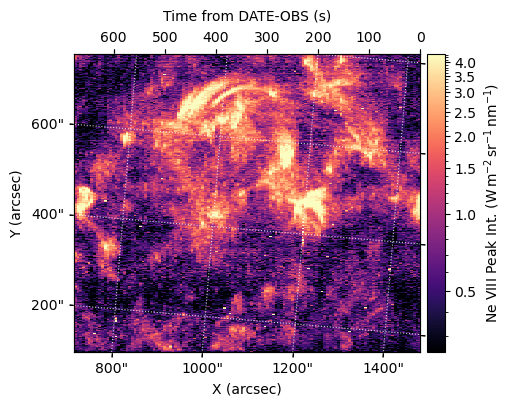

In [26]:
fig = plt.figure(figsize=(5, 5), layout="constrained")
ax = fig.add_subplot(111, projection=spice_NIV_NeVIII_window_1024.wcs[0,0,100:700,:])
im = ax.imshow(NeVIII_peak_int_1024[100:700,:], origin='lower', cmap='magma', aspect=spice_NIV_NeVIII_window_1024.wcs.wcs.cdelt[1]/spice_NIV_NeVIII_window_1024.wcs.wcs.cdelt[0],
          norm=ImageNormalize(vmin=np.nanpercentile(NeVIII_peak_int_1024,10),
                              vmax=np.nanpercentile(NeVIII_peak_int_1024,99), stretch=AsinhStretch()),
                              alpha=0)
ax.coords[0].set_axislabel("X (arcsec)")
ax.coords[1].set_axislabel("Y (arcsec)")
ax.coords[2].set_axislabel("Time from DATE-OBS (s)")

# ax.coords.grid(True, color='white', ls='solid')

ax_invisible = fig.add_subplot(111, projection=NeVIII_peak_int_1024_sunpy_map.wcs)
im = ax_invisible.imshow(NeVIII_peak_int_1024_sunpy_map.data, aspect=spice_NIV_NeVIII_window_1024.wcs.wcs.cdelt[1]/spice_NIV_NeVIII_window_1024.wcs.wcs.cdelt[0],
                              norm=ImageNormalize(vmin=np.nanpercentile(NeVIII_peak_int_1024,10),
                              vmax=np.nanpercentile(NeVIII_peak_int_1024,99), stretch=AsinhStretch()),
                              cmap='magma', interpolation='none')
# NeVIII_peak_int_1024_sunpy_map.plot(axes=ax_invisible, alpha=0, 
#                                aspect=spice_NIV_NeVIII_window_1024.wcs.wcs.cdelt[1]/spice_NIV_NeVIII_window_1024.wcs.wcs.cdelt[0],
#                                title=None)
ax_invisible.coords.grid(True, color='white', ls=':', lw=0.8, alpha=0.8)
ax_invisible.set_facecolor((0,0,0,0))
ax_invisible.coords[0].set_axislabel(" ")
ax_invisible.coords[1].set_axislabel(" ")
ax_invisible.tick_params(axis="x", bottom=False, top=False, labelbottom=False, labeltop=False)
ax_invisible.tick_params(axis="y", left=False, right=True, labelleft=False, labelright=False)
clb, clb_ax = plot_colorbar(im, ax_invisible, bbox_to_anchor=(1.02, 0, 0.05, 1))
clb_ax.set_ylabel(r"Ne VIII Peak Int. (W$\rm\,m^{-2}\,sr^{-1}\,nm^{-1}$)")
# ax_invisible.coords[0].frame.set_linewidth(0)
# ax_invisible.coords[1].frame.set_linewidth(0)
# ax_invisible.coords[0].frame.set_color('black')
# ax_invisible.coords[1].frame.set_color('black')

fig.savefig("../../figs/test_figs/NeVIII_peak_int_1024.pdf", bbox_inches='tight')